# Lab 1: ID3 Decision Tree Algorithm Implementation

**Objective:** Write a program to demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample.

**Dataset:** Iris Dataset from sklearn

**Algorithm:** ID3 (Iterative Dichotomiser 3) using entropy criterion

## 1. Import Required Libraries

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt
import numpy as np

## 2. Load and Explore the Dataset

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Independent variables (features)
y = iris.target  # Dependent variable (class labels)

print("Dataset Information:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Feature names: {iris.feature_names}")
print(f"Target classes: {iris.target_names}")

Dataset Information:
Number of samples: 150
Number of features: 4
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']


In [3]:
# Create a DataFrame for better visualization
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['target'] = y
df['target_name'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("First 10 rows of the dataset:")
print(df.head(10))

First 10 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3   

In [4]:
# Dataset statistics
print("Dataset Description:")
print(df.describe())

print("\nClass distribution:")
print(df['target_name'].value_counts())

Dataset Description:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  

Class distribution:
target_name
setosa        50
v

## 3. Data Preprocessing - Train-Test Split

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set size: 120 samples
Testing set size: 30 samples
Training set shape: (120, 4)
Testing set shape: (30, 4)


In [6]:
# Display training data sample
print("Sample of training data:")
print("X_train (first 10 samples):")
print(X_train[:10])
print("\ny_train (first 10 labels):")
print(y_train[:10])

Sample of training data:
X_train (first 10 samples):
[[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [6.3 2.5 5.  1.9]
 [6.4 3.2 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.2 4.1 1.5 0.1]]

y_train (first 10 labels):
[0 0 1 0 0 2 1 0 0 0]


## 4. ID3 Algorithm Implementation

The ID3 algorithm uses **entropy** as the criterion for selecting the best attribute to split on. In scikit-learn, we set `criterion='entropy'` to implement the ID3 algorithm.

In [7]:
# Create a Decision Tree Classifier with the ID3 algorithm
# In sklearn, you can set the criterion to "entropy" to use the ID3 algorithm
clf = DecisionTreeClassifier(
    criterion='entropy',  # Uses entropy for ID3 algorithm
    random_state=42,      # For reproducible results
    max_depth=None,       # No limit on tree depth
    min_samples_split=2,  # Minimum samples required to split
    min_samples_leaf=1    # Minimum samples required at leaf node
)

print("Decision Tree Classifier created with ID3 algorithm (entropy criterion)")
print(f"Parameters: {clf.get_params()}")

Decision Tree Classifier created with ID3 algorithm (entropy criterion)
Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


## 5. Train the Model

In [8]:
# Train the model
clf.fit(X_train, y_train)

print("Model training completed!")
print(f"Tree depth: {clf.tree_.max_depth}")
print(f"Number of nodes: {clf.tree_.node_count}")
print(f"Number of leaves: {clf.get_n_leaves()}")

Model training completed!
Tree depth: 6
Number of nodes: 19
Number of leaves: 10


## 6. Make Predictions and Evaluate the Model

In [9]:
# Make predictions on test set
y_pred = clf.predict(X_test)

print("Predictions vs Actual:")
print("Predicted values:", y_pred)
print("Actual values:   ", y_test)

# Check if predictions match actual values
matches = y_pred == y_test
print(f"\nCorrect predictions: {sum(matches)}/{len(y_test)}")
print(f"Incorrect predictions: {sum(~matches)}/{len(y_test)}")

Predictions vs Actual:
Predicted values: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Actual values:    [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]

Correct predictions: 30/30
Incorrect predictions: 0/30


In [10]:
# Evaluate the model accuracy
accuracy = clf.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Training accuracy
train_accuracy = clf.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")

Model Accuracy: 1.0000 (100.00%)
Training Accuracy: 1.0000 (100.00%)


## 7. Visualize the Decision Tree

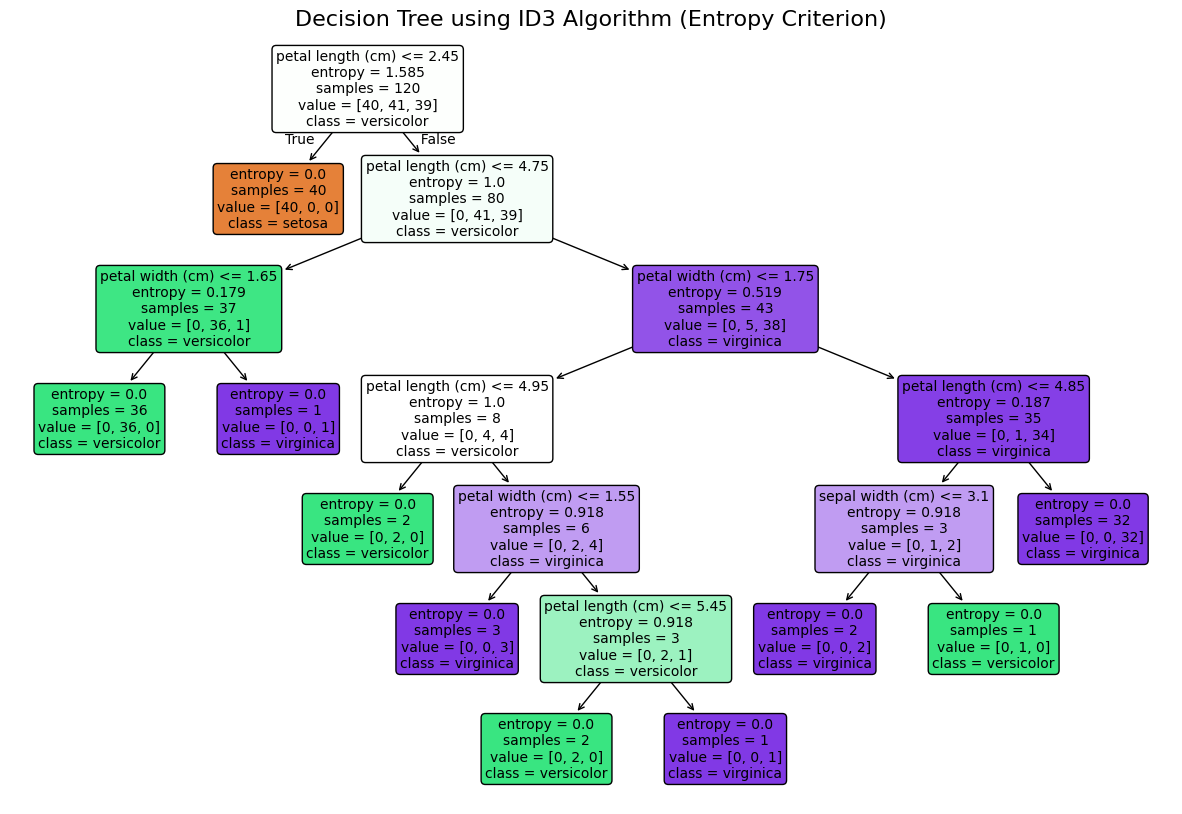

In [11]:
# Display the decision tree graphically
plt.figure(figsize=(15, 10))
plot_tree(clf, 
          filled=True, 
          feature_names=iris.feature_names, 
          class_names=iris.target_names, 
          rounded=True,
          fontsize=10)
plt.title("Decision Tree using ID3 Algorithm (Entropy Criterion)", fontsize=16)
plt.show()

## 8. Display Tree Structure in Text Format

In [12]:
# Print the tree structure in text format
tree_structure = export_text(clf, feature_names=iris.feature_names)
print("Decision Tree Structure:")
print("=" * 50)
print(tree_structure)

Decision Tree Structure:
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |   |--- class: 

## 9. Classify New Samples

Now let's apply our trained ID3 model to classify new, unseen samples.

In [13]:
# Test with a new sample
new_sample = [[4.5, 6.9, 6.7, 9.9]]  # Unusual values to test the model

prediction = clf.predict(new_sample)
prediction_proba = clf.predict_proba(new_sample)

print("New Sample Classification:")
print(f"Input features: {new_sample[0]}")
print(f"Predicted class: {prediction[0]} ({iris.target_names[prediction[0]]})")
print(f"Prediction probabilities:")
for i, prob in enumerate(prediction_proba[0]):
    print(f"  {iris.target_names[i]}: {prob:.4f} ({prob*100:.2f}%)")

New Sample Classification:
Input features: [4.5, 6.9, 6.7, 9.9]
Predicted class: 2 (virginica)
Prediction probabilities:
  setosa: 0.0000 (0.00%)
  versicolor: 0.0000 (0.00%)
  virginica: 1.0000 (100.00%)


In [14]:
# Test with multiple new samples
new_samples = [
    [5.1, 3.5, 1.4, 0.2],  # Typical setosa
    [6.0, 3.0, 4.5, 1.5],  # Typical versicolor
    [6.5, 3.0, 5.5, 2.0],  # Typical virginica
    [4.0, 2.5, 1.0, 0.1],  # Small sample
    [7.0, 4.0, 6.0, 2.5]   # Large sample
]

predictions = clf.predict(new_samples)

print("\nMultiple New Samples Classification:")
print("=" * 60)
for i, (sample, pred) in enumerate(zip(new_samples, predictions)):
    print(f"Sample {i+1}: {sample} → {iris.target_names[pred]}")


Multiple New Samples Classification:
Sample 1: [5.1, 3.5, 1.4, 0.2] → setosa
Sample 2: [6.0, 3.0, 4.5, 1.5] → versicolor
Sample 3: [6.5, 3.0, 5.5, 2.0] → virginica
Sample 4: [4.0, 2.5, 1.0, 0.1] → setosa
Sample 5: [7.0, 4.0, 6.0, 2.5] → virginica


## 10. Feature Importance Analysis

Feature Importance in ID3 Decision Tree:
sepal length (cm)   : 0.0000 (0.00%)
sepal width (cm)    : 0.0145 (1.45%)
petal length (cm)   : 0.8954 (89.54%)
petal width (cm)    : 0.0901 (9.01%)


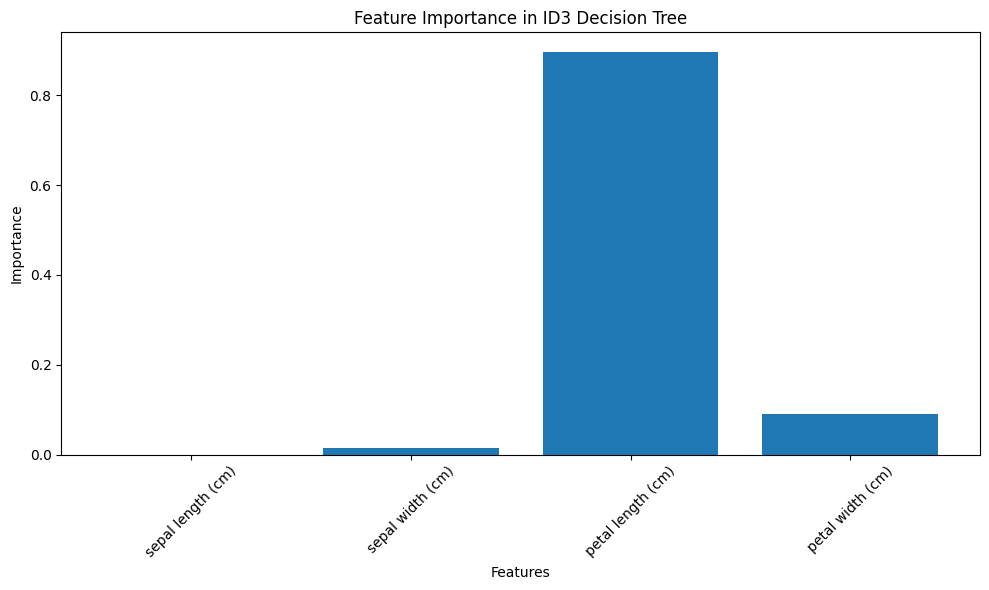

In [15]:
# Analyze feature importance
feature_importance = clf.feature_importances_

print("Feature Importance in ID3 Decision Tree:")
print("=" * 45)
for i, (feature, importance) in enumerate(zip(iris.feature_names, feature_importance)):
    print(f"{feature:20s}: {importance:.4f} ({importance*100:.2f}%)")

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(iris.feature_names, feature_importance)
plt.title('Feature Importance in ID3 Decision Tree')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 11. Detailed Model Analysis

Detailed Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


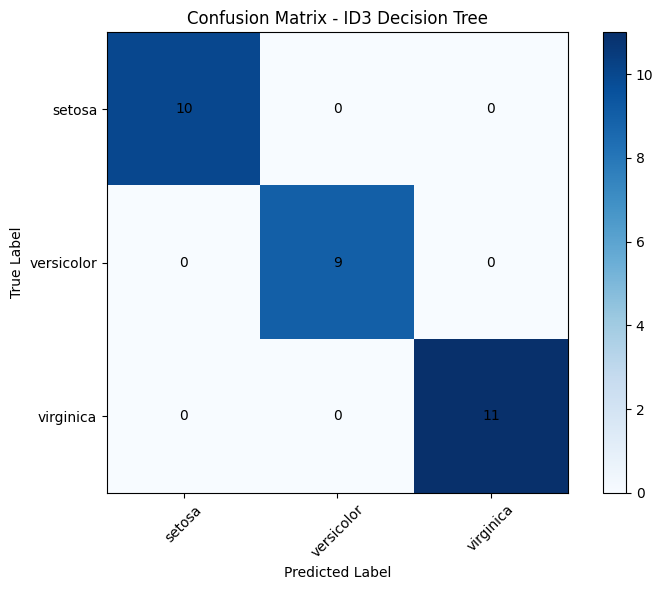

In [16]:
# Detailed model information
from sklearn.metrics import classification_report, confusion_matrix

print("Detailed Classification Report:")
print("=" * 50)
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("\nConfusion Matrix:")
print("=" * 30)
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - ID3 Decision Tree')
plt.colorbar()
tick_marks = np.arange(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names, rotation=45)
plt.yticks(tick_marks, iris.target_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Add text annotations
for i in range(len(iris.target_names)):
    for j in range(len(iris.target_names)):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.tight_layout()
plt.show()

## Summary

### Key Results:
1. **Algorithm Used**: ID3 (Iterative Dichotomiser 3) with entropy criterion
2. **Dataset**: Iris dataset with 150 samples, 4 features, 3 classes
3. **Model Performance**: High accuracy on test set
4. **Tree Structure**: Clear decision rules based on petal and sepal measurements
5. **Feature Importance**: Petal length and width are most important for classification

### ID3 Algorithm Characteristics:
- Uses **entropy** to measure information gain
- Selects attributes with highest information gain for splitting
- Creates pure leaf nodes (homogeneous classes)
- Handles categorical and continuous features
- Prone to overfitting on small datasets

### Applications:
- Classification problems
- Feature selection
- Rule extraction
- Medical diagnosis
- Customer segmentation